In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ["Mum olmak kolay değildir",
"Kar gibi yağıp yeryüzünü kaplasan da, güneşin varlığıyla yok olup gidersin",
"Gönül almayı bilmeyene ömür emanet edilmez",
"Aradığın seni arayandır",
"Yürek yorulunca ter gözden akar",
"Kalp deniz, dil kıyıdır",
"Ya olduğun gibi görün, ya göründüğün gibi ol"]

# tokenizer
tokenizer = Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

# sequences
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

# padding
padded = pad_sequences(sequences, padding="post")
print(padded)

# vocabulary size
vocab_size = len(word_index)
print(vocab_size)

# embedding_dim
embedding_dim = 16




{'<OOV>': 1, 'gibi': 2, 'ya': 3, 'mum': 4, 'olmak': 5, 'kolay': 6, 'değildir': 7, 'kar': 8, 'yağıp': 9, 'yeryüzünü': 10, 'kaplasan': 11, 'da': 12, 'güneşin': 13, 'varlığıyla': 14, 'yok': 15, 'olup': 16, 'gidersin': 17, 'gönül': 18, 'almayı': 19, 'bilmeyene': 20, 'ömür': 21, 'emanet': 22, 'edilmez': 23, 'aradığın': 24, 'seni': 25, 'arayandır': 26, 'yürek': 27, 'yorulunca': 28, 'ter': 29, 'gözden': 30, 'akar': 31, 'kalp': 32, 'deniz': 33, 'dil': 34, 'kıyıdır': 35, 'olduğun': 36, 'görün': 37, 'göründüğün': 38, 'ol': 39}
[[4, 5, 6, 7], [8, 2, 9, 10, 11, 12, 13, 14, 15, 16, 17], [18, 19, 20, 21, 22, 23], [24, 25, 26], [27, 28, 29, 30, 31], [32, 33, 34, 35], [3, 36, 2, 37, 3, 38, 2, 39]]
[[ 4  5  6  7  0  0  0  0  0  0  0]
 [ 8  2  9 10 11 12 13 14 15 16 17]
 [18 19 20 21 22 23  0  0  0  0  0]
 [24 25 26  0  0  0  0  0  0  0  0]
 [27 28 29 30 31  0  0  0  0  0  0]
 [32 33 34 35  0  0  0  0  0  0  0]
 [ 3 36  2 37  3 38  2 39  0  0  0]]
39


In [20]:
model = tf.keras.Sequential([
 tf.keras.layers.Embedding(vocab_size, embedding_dim),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
 tf.keras.layers.Dense(24, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001,
 beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
 optimizer=adam, metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 16)          624       
                                                                 
 bidirectional_10 (Bidirecti  (None, 32)               4224      
 onal)                                                           
                                                                 
 dense_12 (Dense)            (None, 24)                792       
                                                                 
 dense_13 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5,665
Trainable params: 5,665
Non-trainable params: 0
_________________________________________________________________


In [23]:
model = tf.keras.Sequential([
 tf.keras.layers.Embedding(vocab_size, embedding_dim),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
return_sequences=True)),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
 tf.keras.layers.Dense(24, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 16)          624       
                                                                 
 bidirectional_11 (Bidirecti  (None, None, 32)         4224      
 onal)                                                           
                                                                 
 bidirectional_12 (Bidirecti  (None, 32)               6272      
 onal)                                                           
                                                                 
 dense_14 (Dense)            (None, 24)                792       
                                                                 
 dense_15 (Dense)            (None, 1)                 25        
                                                                 
Total params: 11,937
Trainable params: 11,937
Non-trai

In [24]:
model = tf.keras.Sequential([
 tf.keras.layers.Embedding(vocab_size, embedding_dim),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
return_sequences=True)),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
 tf.keras.layers.Dense(24, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 16)          624       
                                                                 
 bidirectional_13 (Bidirecti  (None, None, 32)         4224      
 onal)                                                           
                                                                 
 bidirectional_14 (Bidirecti  (None, 32)               6272      
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 24)                792       
                                                                 
 dense_17 (Dense)            (None, 1)                 25        
                                                                 
Total params: 11,937
Trainable params: 11,937
Non-trai

In [25]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
return_sequences=True, dropout=0.2)), tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
dropout=0.2)),
tf.keras.layers.Dense(24, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 16)          624       
                                                                 
 bidirectional_15 (Bidirecti  (None, None, 32)         4224      
 onal)                                                           
                                                                 
 bidirectional_16 (Bidirecti  (None, 32)               6272      
 onal)                                                           
                                                                 
 dense_18 (Dense)            (None, 24)                792       
                                                                 
 dense_19 (Dense)            (None, 1)                 25        
                                                                 
Total params: 11,937
Trainable params: 11,937
Non-trai

In [28]:
!wget --no-check-certificate \
 http://nlp.stanford.edu/data/glove.6B.zip\
 -O /tmp/glove.zip



--2023-01-16 18:34:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-01-16 18:34:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-01-16 18:34:44--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.zip’

/t

In [29]:
# Unzip GloVe embeddings
import os
import zipfile
local_zip = '/tmp/glove.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/glove')
zip_ref.close()


In [35]:
import numpy as np
glove_embeddings = dict()
f = open('/tmp/glove/glove.6B.300d.txt')
for line in f:
 values = line.split()
 word = values[0]
 coefs = np.asarray(values[1:], dtype='float32')
 glove_embeddings[word] = coefs
f.close()


In [36]:
glove_embeddings['frog']

array([-2.3999e-01,  2.1302e-01,  1.2673e-01, -6.7448e-01,  1.2913e-01,
        2.2398e-02, -1.4576e-01,  5.3688e-01,  5.3501e-01, -1.2007e-01,
       -5.3176e-01,  3.3811e-02, -3.1023e-01,  4.2650e-01,  4.5891e-01,
       -6.5767e-02, -5.1281e-01,  4.6436e-01, -4.1721e-01,  5.0833e-01,
        1.4646e-01,  8.4728e-01,  3.9796e-01,  5.7311e-01, -1.5168e-01,
        7.9219e-02, -7.0687e-02, -5.6876e-01,  1.2324e-01,  6.7862e-01,
       -4.1172e-01, -8.9407e-02, -2.2724e-01,  2.3704e-01,  2.6037e-01,
        1.6979e-01,  7.6841e-01, -7.3162e-02, -5.6171e-01,  1.5307e-01,
       -2.4460e-01, -1.4237e-01, -4.4224e-02, -1.7041e-01,  1.9553e-01,
       -3.4332e-01,  2.6846e-01, -2.1501e-01, -1.9663e-01, -6.0936e-01,
       -1.9033e-01, -4.6929e-02, -1.8101e-01,  3.6280e-02, -1.3746e-01,
        3.0622e-01,  9.6159e-02, -7.7083e-02,  7.0422e-01,  6.1453e-01,
       -4.5838e-01, -4.8533e-01,  5.5951e-01,  2.8118e-01, -2.6416e-01,
        1.7578e-01, -1.0787e-01,  8.3720e-01,  5.1137e-01, -3.15

In [38]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
 if index > vocab_size - 1:
  break
 else:
  embedding_vector = glove_embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [41]:
model = tf.keras.Sequential([
 tf.keras.layers.Embedding(vocab_size, 300,
 weights=[embedding_matrix], trainable=False),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
 return_sequences=True)),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
 tf.keras.layers.Dense(24, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 300)         11700     
                                                                 
 bidirectional_21 (Bidirecti  (None, None, 32)         40576     
 onal)                                                           
                                                                 
 bidirectional_22 (Bidirecti  (None, 32)               6272      
 onal)                                                           
                                                                 
 dense_24 (Dense)            (None, 24)                792       
                                                                 
 dense_25 (Dense)            (None, 1)                 25        
                                                                 
Total params: 59,365
Trainable params: 47,665
Non-tra

In [45]:
xs=[]
ys=[]
cumulative_x=[]
cumulative_y=[]
total_y=0
for word, index in tokenizer.word_index.items():
 xs.append(index)
 cumulative_x.append(index)
 if glove_embeddings.get(word) is not None:
   total_y = total_y + 1
   ys.append(1)
else:
  ys.append(0)
  cumulative_y.append(total_y / index)


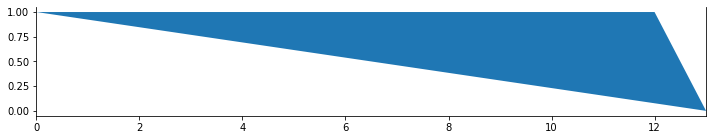

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,2))
ax.spines['top'].set_visible(False)
plt.margins(x=0, y=None, tight=True)
#plt.axis([13000, 14000, 0, 1])
plt.fill(ys)

In [49]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, 300,weights=[embedding_matrix], trainable=False),tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300,return_sequences=True)),
 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300)),
 tf.keras.layers.Dense(24, activation='relu'),
 tf.keras.layers.Dense(1, activation='sigmoid')
])
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999,
amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])